## Natural Language Processing - Assignment 02

In [1]:
# Importing necessary modules/ libraries 
import pandas as pd 
import re
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import nltk.corpus  
from nltk.text import Text
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the csv file 
df = pd.read_csv('/Users/parthbansal/Downloads/Food_Inspections.csv')
data = df 
df.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,2573172,3 SAUCES,3 SAUCES,2835644.0,Restaurant,Risk 1 (High),2002 S WENTWORTH AVE,CHICAGO,IL,60616.0,03/24/2023,Canvass,Pass,49. NON-FOOD/FOOD CONTACT SURFACES CLEAN - Com...,41.855282,-87.631993,"(41.85528170377401, -87.63199264229414)"
1,2573171,K G HALL,K G HALL,1887545.0,Banquet Hall,Risk 1 (High),4235 W 47TH ST,CHICAGO,IL,60632.0,03/24/2023,Non-Inspection,No Entry,NaN,41.807682,-87.729847,"(41.807682027157476, -87.72984725145503)"
2,2573162,MARATHON,MARATHON,2900506.0,GAS STATION,Risk 3 (Low),5800-5810 W BELMONT AVE,CHICAGO,IL,60634.0,03/24/2023,License,Not Ready,NaN,41.938620,-87.771420,"(41.93861992874789, -87.77142033127757)"
3,2573131,ANTEPRIMA,ANTEPRIMA,1770521.0,Restaurant,Risk 1 (High),5316 N CLARK ST,CHICAGO,IL,60640.0,03/24/2023,Non-Inspection,No Entry,NaN,41.978616,-87.668470,"(41.97861615439425, -87.66847038837432)"
4,2573107,Cullen,Cullen,23891.0,School,Risk 1 (High),10650 S Eberhart (500E),CHICAGO,IL,60628.0,03/24/2023,Canvass,Pass,10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLI...,41.700361,-87.611282,"(41.70036106831835, -87.611281758793)"


#### 1. Similar to Assignment 1, filter the data for failed inspections and only keep records where Violations description is not blank. 

In [3]:
df['Results'].unique()

array(['Pass', 'No Entry', 'Not Ready', 'Out of Business', 'Fail',
       'Pass w/ Conditions', 'Business Not Located'], dtype=object)

In [4]:
# Dropping results column since all results are 'Fail'
df = df[df['Results'] == 'Fail']
df = df.drop('Results', axis = 1)

In [5]:
df = df.dropna(subset = 'Violations')

In [6]:
# No NULL violations
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45485 entries, 8 to 251496
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Inspection ID    45485 non-null  int64  
 1   DBA Name         45485 non-null  object 
 2   AKA Name         45020 non-null  object 
 3   License #        45483 non-null  float64
 4   Facility Type    45452 non-null  object 
 5   Risk             45484 non-null  object 
 6   Address          45485 non-null  object 
 7   City             45463 non-null  object 
 8   State            45475 non-null  object 
 9   Zip              45480 non-null  float64
 10  Inspection Date  45485 non-null  object 
 11  Inspection Type  45485 non-null  object 
 12  Violations       45485 non-null  object 
 13  Latitude         45325 non-null  float64
 14  Longitude        45325 non-null  float64
 15  Location         45325 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 5.9+ MB

In [7]:
df.shape

(45485, 16)

#### 2. Using regex, separate the violation description and comments into separate data frame columns.

In [8]:
# df['Violations'].sample(10, random_state=42)

In [9]:
df['Violations'] = df['Violations'].str.split('|')

In [10]:
df['Description'] = df['Violations'].apply(lambda x: [re.findall(r'\d+\. (.+?) -', i) for i in x])

In [11]:
df['Comments'] = df['Violations'].apply(lambda x: [re.findall(r'Comments: (.+?)\.', i) for i in x])

In [12]:
# Dropping redundant columns 
df = df.drop(columns= ['Inspection ID', 'DBA Name', 'License #', 'Facility Type', 'Risk', 'Address', 'Inspection Type', 'AKA Name', 'City', 'State', 'Zip', 'Violations', 'Latitude', 'Longitude', 'Location'])

In [13]:
df.head()

,Inspection Date,Description,Comments
8,03/23/2023,"[[INSECTS, RODENTS, & ANIMALS NOT PRESENT], [T...","[[OBSERVED NO CURRENT PEST CONTROL LOGBOOK], [..."
46,03/16/2023,"[[INSECTS, RODENTS, & ANIMALS NOT PRESENT], [I...",[[OBSERVED SMALL ROOM ADJACENT TO KITCHEN WITH...
113,03/01/2023,"[[PERSON IN CHARGE PRESENT, DEMONSTRATES KNOWL...",[[PIC HAS A COPY OF CITY FOOD MANAGERS CERTIFI...
133,02/27/2023,"[[PERSON IN CHARGE PRESENT, DEMONSTRATES KNOWL...",[[THE PERSON IN CHARGE DURING THE INSPECTION D...
135,02/27/2023,"[[], [CITY OF CHICAGO FOOD SERVICE SANITATION ...","[[], [No certified food service manager on sit..."


#### 3. Tokenize violation description and comment columns.

In [14]:
description = df.explode('Description').explode('Description')
comments = df.explode('Comments').explode('Comments')

In [15]:
description = description.dropna()
comments = comments.dropna()

In [16]:
descriptions = ', '.join(description.Description)

In [17]:
comments = ', '.join(comments.Comments)

In [18]:
# Tokeknizing descriptions and comments 
descriptions = nltk.tokenize.word_tokenize(descriptions)
comments = nltk.tokenize.word_tokenize(comments)

#### 4. Find top-10 tokens of each column.

In [19]:
freq_descriptions = nltk.FreqDist(descriptions)
freq_comments = nltk.FreqDist(comments)

In [20]:
top_10_desc = freq_descriptions.most_common(10)
top_10_desc

[(',', 656770),
 ('AND', 169625),
 (':', 126037),
 ('MAINTAINED', 84905),
 ('FOOD', 84250),
 ('PROPERLY', 68557),
 ('CLEAN', 66985),
 ('&', 66839),
 ('CONSTRUCTED', 66117),
 ('INSTALLED', 64359)]

In [21]:
top_10_comm = freq_comments.most_common(10)
top_10_comm 

[(',', 453205),
 ('THE', 126140),
 ('AND', 121811),
 ('IN', 117598),
 ('OBSERVED', 79734),
 ('and', 70135),
 ('OF', 69570),
 ('ON', 66670),
 ('AREA', 52268),
 ('FOOD', 48630)]

#### 5. Clean each column: convert to lower case, remove stopwords, punctuation, numbers, etc.

In [22]:
# Removing single-character tokens (mostly punctuation and determiner 'a')
descriptions = [word for word in descriptions if len(word) > 1]
comments = [word for word in comments if len(word) > 1]

# Removing punctuation
descriptions = [word for word in descriptions if word.isalpha()]
comments = [word for word in comments if word.isalpha()]

# Case folding --> Lower case
descriptions = [word.lower() for word in descriptions]
comments = [word.lower() for word in comments]

# Removing stop words 
stopwords = set(nltk.corpus.stopwords.words('english'))
descriptions = [word for word in descriptions if word not in stopwords]
comments = [word for word in comments if word not in stopwords]

# Removing numbers 
descriptions = [word for word in descriptions if not word.isnumeric()]
comments = [word for word in comments if not word.isnumeric()]

 #### 6. Find top-10 tokens again.

In [23]:
freq_descriptions = nltk.FreqDist(descriptions)
freq_comments = nltk.FreqDist(comments)

In [24]:
top_10_desc_clean = freq_descriptions.most_common(10)
top_10_desc_clean

[('maintained', 84906),
 ('food', 84250),
 ('properly', 68557),
 ('clean', 66986),
 ('constructed', 66117),
 ('equipment', 64360),
 ('installed', 64359),
 ('cleaning', 48233),
 ('surfaces', 48187),
 ('contact', 45194)]

In [25]:
top_10_comm_clean = freq_comments.most_common(10)
top_10_comm_clean

[('observed', 82267),
 ('food', 74980),
 ('area', 54993),
 ('must', 45612),
 ('prep', 45303),
 ('sink', 39837),
 ('clean', 38649),
 ('shall', 34977),
 ('storage', 32280),
 ('floor', 28223)]

 #### 7. Find top-10 tokens after applying Porter stemming to the columns obtained in step 5.

In [26]:
porter = nltk.PorterStemmer()

In [27]:
porter_descriptions = [porter.stem(word) for word in descriptions]
porter_comments = [porter.stem(word) for word in comments]

In [28]:
freq_descriptions = nltk.FreqDist(porter_descriptions)
freq_comments = nltk.FreqDist(porter_comments)

In [29]:
top_10_desc_porter = freq_descriptions.most_common(10)
top_10_desc_porter

[('clean', 141204),
 ('food', 88683),
 ('maintain', 88528),
 ('properli', 68557),
 ('construct', 66118),
 ('instal', 64371),
 ('equip', 64360),
 ('surfac', 48204),
 ('contact', 45194),
 ('method', 40936)]

In [30]:
top_10_comm_porter = freq_comments.most_common(10)
top_10_comm_porter

[('food', 85764),
 ('observ', 82576),
 ('area', 68826),
 ('clean', 56809),
 ('sink', 47641),
 ('must', 45613),
 ('prep', 45544),
 ('floor', 43340),
 ('shall', 34977),
 ('storag', 32318)]

 #### 8. Find top-10 tokens after applying Lancaster stemming to the columns obtained in step 5.

In [31]:
lancaster = nltk.LancasterStemmer()

In [32]:
lancaster_descriptions = [lancaster.stem(word) for word in descriptions]
lancaster_comments = [lancaster.stem(word) for word in comments]

In [33]:
freq_descriptions = nltk.FreqDist(lancaster_descriptions)
freq_comments = nltk.FreqDist(lancaster_comments)

In [34]:
top_10_desc_lanc = freq_descriptions.most_common(10)
top_10_desc_lanc

[('cle', 149033),
 ('food', 88683),
 ('maintain', 88528),
 ('prop', 84848),
 ('construct', 66118),
 ('instal', 64371),
 ('equip', 64360),
 ('surfac', 48204),
 ('contact', 45194),
 ('method', 40936)]

In [35]:
top_10_comm_lanc = freq_comments.most_common(10)
top_10_comm_lanc

[('food', 85765),
 ('observ', 82576),
 ('cle', 61103),
 ('prep', 55718),
 ('are', 54993),
 ('stor', 51422),
 ('sink', 47643),
 ('must', 45614),
 ('flo', 43894),
 ('shal', 34981)]

 #### 9. Find top-10 tokens after applying lemmatization to the columns obtained in step 5.

In [36]:
wnl = nltk.WordNetLemmatizer()

In [37]:
wnl_descriptions = [wnl.lemmatize(word) for word in descriptions]
wnl_comments = [wnl.lemmatize(word) for word in comments]

In [38]:
freq_descriptions = nltk.FreqDist(wnl_descriptions)
freq_comments = nltk.FreqDist(wnl_comments)

In [39]:
top_10_desc_lemm = freq_descriptions.most_common(10)
top_10_desc_lemm

[('food', 88683),
 ('maintained', 84906),
 ('properly', 68557),
 ('clean', 66986),
 ('constructed', 66117),
 ('equipment', 64360),
 ('installed', 64359),
 ('cleaning', 48233),
 ('surface', 48204),
 ('contact', 45194)]

In [40]:
top_10_comm_lemm = freq_comments.most_common(10)
top_10_comm_lemm

[('food', 85764),
 ('observed', 82267),
 ('area', 68826),
 ('sink', 47640),
 ('must', 45613),
 ('prep', 45305),
 ('floor', 43196),
 ('clean', 38651),
 ('shall', 34977),
 ('storage', 32314)]

 #### 10, Compare top-10 tokens obtained in 4, 6, 7, 8, 9.

In [41]:
# Description Tokens Comparison
desc_comparision = pd.DataFrame({"4": top_10_desc, "6": top_10_desc_clean, "7":top_10_desc_porter, "8":top_10_desc_lanc, "9":top_10_desc_lemm})
desc_comparision

,4,6,7,8,9
0,"(,, 656770)","(maintained, 84906)","(clean, 141204)","(cle, 149033)","(food, 88683)"
1,"(AND, 169625)","(food, 84250)","(food, 88683)","(food, 88683)","(maintained, 84906)"
2,"(:, 126037)","(properly, 68557)","(maintain, 88528)","(maintain, 88528)","(properly, 68557)"
3,"(MAINTAINED, 84905)","(clean, 66986)","(properli, 68557)","(prop, 84848)","(clean, 66986)"
4,"(FOOD, 84250)","(constructed, 66117)","(construct, 66118)","(construct, 66118)","(constructed, 66117)"
5,"(PROPERLY, 68557)","(equipment, 64360)","(instal, 64371)","(instal, 64371)","(equipment, 64360)"
6,"(CLEAN, 66985)","(installed, 64359)","(equip, 64360)","(equip, 64360)","(installed, 64359)"
7,"(&, 66839)","(cleaning, 48233)","(surfac, 48204)","(surfac, 48204)","(cleaning, 48233)"
8,"(CONSTRUCTED, 66117)","(surfaces, 48187)","(contact, 45194)","(contact, 45194)","(surface, 48204)"
9,"(INSTALLED, 64359)","(contact, 45194)","(method, 40936)","(method, 40936)","(contact, 45194)"


In [42]:
# Comment Tokens Comparison
comm_comparision = pd.DataFrame({"4": top_10_comm, "6": top_10_comm_clean, "7":top_10_comm_porter, "8":top_10_comm_lanc,"9":top_10_comm_lemm})
comm_comparision

,4,6,7,8,9
0,"(,, 453205)","(observed, 82267)","(food, 85764)","(food, 85765)","(food, 85764)"
1,"(THE, 126140)","(food, 74980)","(observ, 82576)","(observ, 82576)","(observed, 82267)"
2,"(AND, 121811)","(area, 54993)","(area, 68826)","(cle, 61103)","(area, 68826)"
3,"(IN, 117598)","(must, 45612)","(clean, 56809)","(prep, 55718)","(sink, 47640)"
4,"(OBSERVED, 79734)","(prep, 45303)","(sink, 47641)","(are, 54993)","(must, 45613)"
5,"(and, 70135)","(sink, 39837)","(must, 45613)","(stor, 51422)","(prep, 45305)"
6,"(OF, 69570)","(clean, 38649)","(prep, 45544)","(sink, 47643)","(floor, 43196)"
7,"(ON, 66670)","(shall, 34977)","(floor, 43340)","(must, 45614)","(clean, 38651)"
8,"(AREA, 52268)","(storage, 32280)","(shall, 34977)","(flo, 43894)","(shall, 34977)"
9,"(FOOD, 48630)","(floor, 28223)","(storag, 32318)","(shal, 34981)","(storage, 32314)"


 #### 11. Describe which approach provided the most comprehensive view of violations / comments and why.

After evaluating various text preprocessing techniques on the food inspection dataset, such as uncleaned tokens, it is lemmatization that produced the most comprehensive and accurate results. As you can see from the table above, lemmatization a complete list of comprehensible tokens unlike the stemming techniques. Lemmatization was able to group together variations of the same word, reducing them to their base form, and thus providing a clearer understanding of the context. However, it is computationally expensive. 

Note: For this dataset, it was observed that the results obtained from the tokenizer after simply cleaning the data were quite similar to the results produced by lemmatization. Therefore, if we want to optimize for computational costs, we can utilize the tokenizer's output after cleaning the data, instead of applying the lemmatization technique. 

 #### 12. Use the "most effective" cleaning approach to plot the distribution of most common tokens (belonging to violation description) over time.

For the purposes of this question, we'll utilize the token reuslts from lemmatization.

In [43]:
df = df.reset_index(drop = True)
df.head()

,Inspection Date,Description,Comments
0,03/23/2023,"[[INSECTS, RODENTS, & ANIMALS NOT PRESENT], [T...","[[OBSERVED NO CURRENT PEST CONTROL LOGBOOK], [..."
1,03/16/2023,"[[INSECTS, RODENTS, & ANIMALS NOT PRESENT], [I...",[[OBSERVED SMALL ROOM ADJACENT TO KITCHEN WITH...
2,03/01/2023,"[[PERSON IN CHARGE PRESENT, DEMONSTRATES KNOWL...",[[PIC HAS A COPY OF CITY FOOD MANAGERS CERTIFI...
3,02/27/2023,"[[PERSON IN CHARGE PRESENT, DEMONSTRATES KNOWL...",[[THE PERSON IN CHARGE DURING THE INSPECTION D...
4,02/27/2023,"[[], [CITY OF CHICAGO FOOD SERVICE SANITATION ...","[[], [No certified food service manager on sit..."


In [44]:
df['Inspection Date'] = pd.to_datetime(df['Inspection Date'])
df['Year'] = df['Inspection Date'].dt.year
df = df.drop('Inspection Date', axis=1)

In [45]:
df_desc = df[['Year', 'Description']] 

In [46]:
df_desc = df_desc.explode('Description').explode('Description')

In [47]:
df_desc.reset_index(drop = True)

,Year,Description
0,2023,"INSECTS, RODENTS, & ANIMALS NOT PRESENT"
1,2023,"TOILET FACILITIES: PROPERLY CONSTRUCTED, SUPPL..."
2,2023,"INSECTS, RODENTS, & ANIMALS NOT PRESENT"
3,2023,"INSECTS, RODENTS, & ANIMALS NOT PRESENT"
4,2023,"INSECTS, RODENTS, & ANIMALS NOT PRESENT"
...,...,...
299694,2010,FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSILS C...
299695,2010,"FLOORS: CONSTRUCTED PER CODE, CLEANED, GOOD RE..."
299696,2010,"WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTRUCTE..."
299697,2010,VENTILATION: ROOMS AND EQUIPMENT VENTED AS REQ...


In [50]:
tokenizer = nltk.tokenize.word_tokenize
df_desc['Tokens'] = df_desc['Description'].apply(tokenizer)

In [51]:
df_desc = df_desc.explode('Tokens')
df_desc.head(10)

,Year,Description,Tokens
0,2023,"INSECTS, RODENTS, & ANIMALS NOT PRESENT",INSECTS
0,2023,"INSECTS, RODENTS, & ANIMALS NOT PRESENT",","
0,2023,"INSECTS, RODENTS, & ANIMALS NOT PRESENT",RODENTS
0,2023,"INSECTS, RODENTS, & ANIMALS NOT PRESENT",","
0,2023,"INSECTS, RODENTS, & ANIMALS NOT PRESENT",&
0,2023,"INSECTS, RODENTS, & ANIMALS NOT PRESENT",ANIMALS
0,2023,"INSECTS, RODENTS, & ANIMALS NOT PRESENT",NOT
0,2023,"INSECTS, RODENTS, & ANIMALS NOT PRESENT",PRESENT
0,2023,"TOILET FACILITIES: PROPERLY CONSTRUCTED, SUPPL...",TOILET
0,2023,"TOILET FACILITIES: PROPERLY CONSTRUCTED, SUPPL...",FACILITIES


In [54]:
# Case folding --> Lower case
df_desc['Tokens'] = df_desc['Tokens'].apply(lambda x: x.lower())

# Removing punctuation
df_desc['Tokens'] = df_desc['Tokens'].apply(lambda x: x if x.isalpha() else '')

# Removing single-character tokens (mostly punctuation and determiner 'a')
df_desc['Tokens'] = df_desc['Tokens'].apply(lambda x: x if len(x) > 1 else '')

# Removing stop words 
df_desc['Tokens'] = df_desc['Tokens'].apply(lambda x: x if x not in stopwords else '')

# Removing numbers 
df_desc['Tokens'] = df_desc['Tokens'].apply(lambda x: x if not x.isnumeric() else '')

In [55]:
df_desc = df_desc[df_desc['Tokens'] != '']

In [56]:
df_desc['desc_lemm'] = df_desc['Tokens'].apply(lambda x: wnl.lemmatize(x))

In [86]:
# Making another dataframe as backup
final = df_desc[['Year', 'desc_lemm']]

In [88]:
final.head(10).reset_index(drop = True)

,Year,desc_lemm
0,2023,insect
1,2023,rodent
2,2023,animal
3,2023,present
4,2023,toilet
5,2023,facility
6,2023,properly
7,2023,constructed
8,2023,supplied
9,2023,cleaned


In [77]:
final = final.groupby(['Year', 'desc_lemm'])['desc_lemm'].count()

In [78]:
top_10_tokens = final.groupby('Year').nlargest(10).reset_index(level = 0, drop = True)
top_10_tokens = top_10_tokens.to_frame().rename(columns = {'desc_lemm':'count'}).reset_index()
top_10_tokens = top_10_tokens.pivot(index ='Year', columns ='desc_lemm',values='count')

Text(0, 0.5, 'Count')

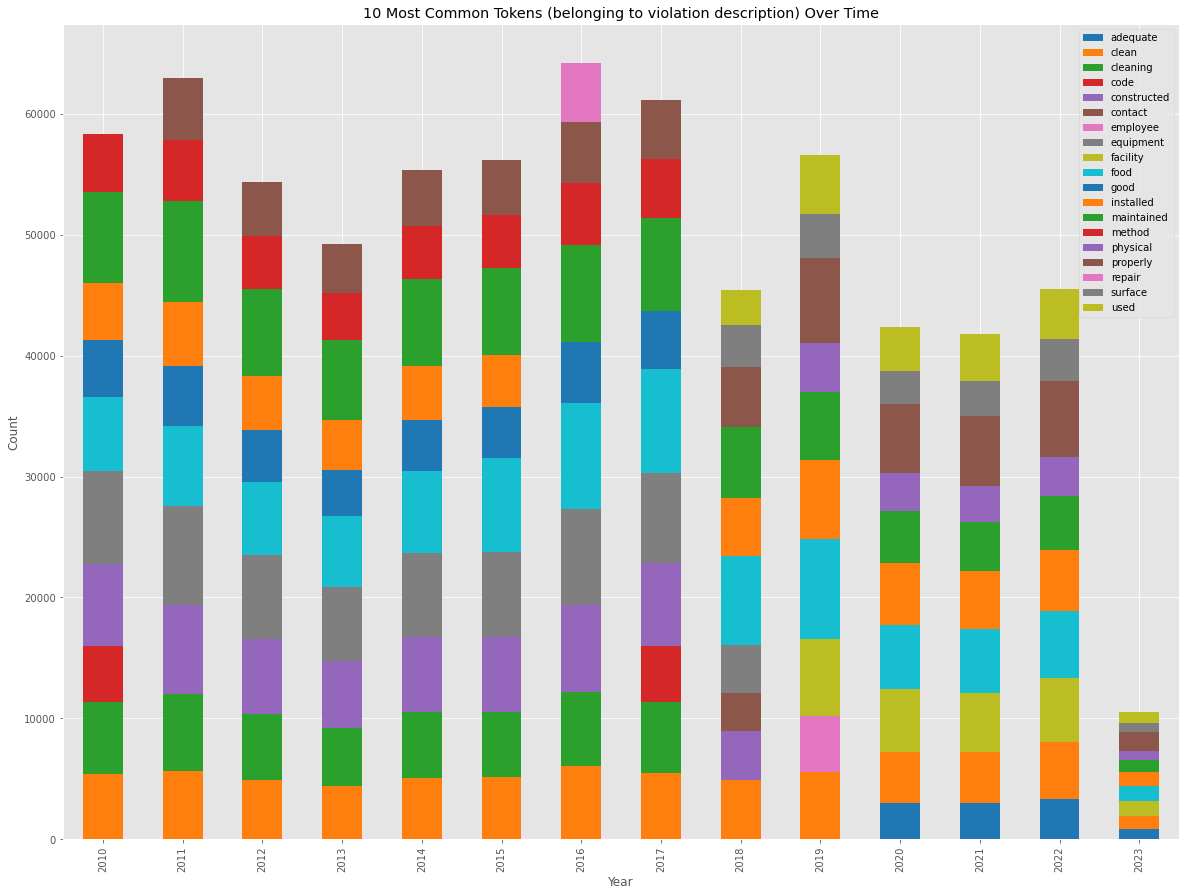

In [84]:
ax = top_10_tokens.plot(kind='bar', stacked = True, figsize=(20,15), color = my_palette)
ax.legend(bbox_to_anchor = (1,1), loc = 'upper right')
ax.set_title('10 Most Common Tokens (belonging to violation description) Over Time')
ax.set_xlabel('Year')
ax.set_ylabel('Count')